<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series EDA

_Author: Unknown_

----
This lab will walk you through performing exploratory data analysis on a dataset of weekly chickenpox cases from Hungary. This dataset is from the UCI Machine Learning Repository. You can read more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Hungarian+Chickenpox+Cases).

-----

### Imports

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
# Only using one county
pox = pd.read_csv('data/hungary_chickenpox.csv')[['Date', 'BUDAPEST']]

# Renaming columns for readability
pox.columns = ['date', 'budapest_cases']
pox.head(3)

,date,budapest_cases
0,03/01/2005,168
1,10/01/2005,157
2,17/01/2005,96


**Check the dataframe dtypes**

In [3]:
# check dtypes
pox.dtypes

date              object
budapest_cases     int64
dtype: object

In [43]:
# check info
pox.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 522 entries, 2005-01-03 to 2014-12-29
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   budapest_cases  522 non-null    int64
dtypes: int64(1)
memory usage: 8.2 KB


**Check for nulls**

In [4]:
# check missing values
pox.isna().sum()

# there is no missing value

date              0
budapest_cases    0
dtype: int64

**Casting the `'Date'` column to a datetime type**

Use `pd.to_datetime` to convert the `Date` column to a datetime.

**WARNING**: The date column is formated as day-month-year. Does `pd.to_datetime` work the way you expect it to on day/month/year strings? If it doesn't work the way you expect it to, check [the documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) for `pd.to_datetime`, and see if one of the settings fixes things.

In [21]:
# convert type object to datetime in column date
pox['date'] = pd.to_datetime(pox['date'], dayfirst=True)

In [24]:
# check type of date column
pox.dtypes

date              datetime64[ns]
budapest_cases             int64
dtype: object

**Set the `'Date'` column to be the index**

In [27]:
# set date as index
pox.set_index('date', inplace=True)

---

Now that our data is formatted appropriately, we can embark on EDA.

### Summary statistics

**What times does the dataset describe?**

That is, what's the earliest date in the dataset, and what's the latest date?

In [35]:
# earliest date
print('Earliest Date:', pox.index.min().strftime('%Y-%m-%d'))

# latest date
print('Latest Date:', pox.index.max().strftime('%Y-%m-%d'))

Earliest Date: 2005-01-03
Latest Date: 2014-12-29


**Plot a histogram of the Budapest cases column**

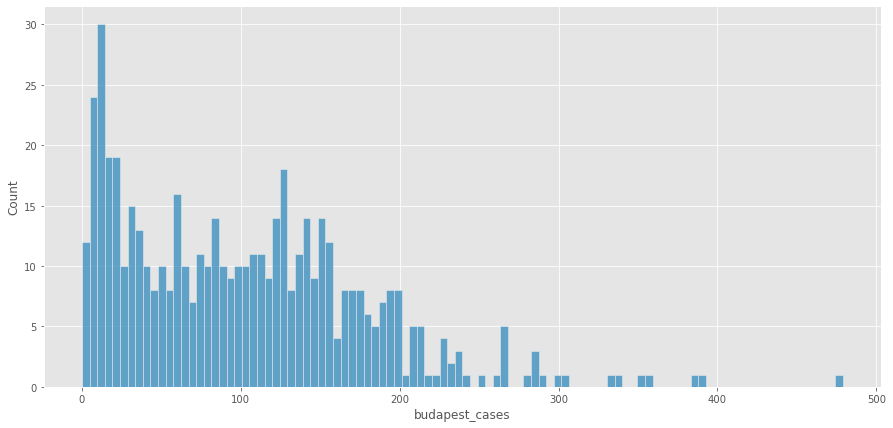

In [44]:
# plot histogram of Budapest cases
plt.figure(figsize=(15,7))
sns.histplot(x='budapest_cases' ,data=pox, bins=100);

In [63]:
# calculate skew
pox['budapest_cases'].skew()

0.9516605073017268

Histogram chart has show cases distribution is right skew.

**How many cases were there per year?**

Recall that with time series data, we can't simply group by on the year. You'll need to use the `resample` method on the DataFrame to answer this question.

In [57]:
# resample and group by year
pox.resample('Y').sum()

,budapest_cases
date,
2005-12-31,4562
2006-12-31,6498
2007-12-31,6311
2008-12-31,4441
2009-12-31,5527
2010-12-31,5222
2011-12-31,5404
2012-12-31,5353
2013-12-31,5157


### Visualizations

**Make a line plot of chickenpox cases**

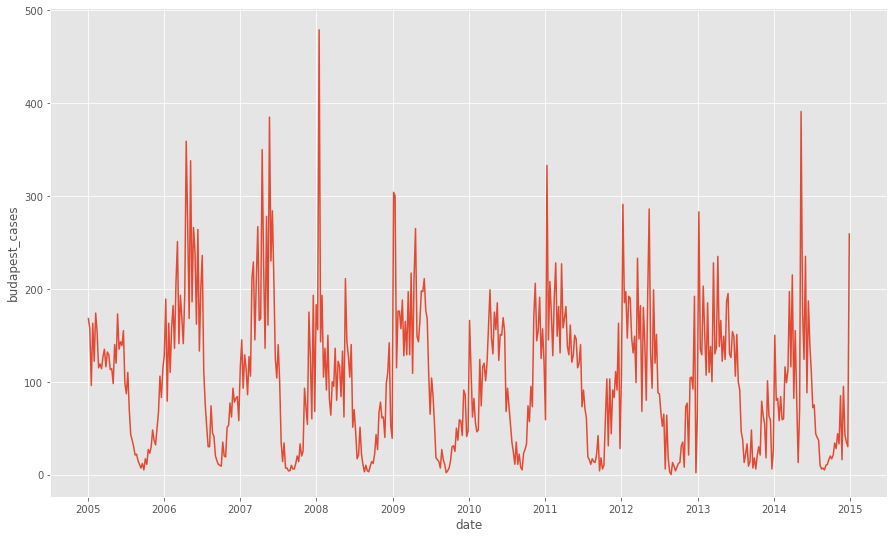

In [62]:
# plot line chickenpox cases
plt.figure(figsize=(15, 9))
sns.lineplot(x = pox.index, y = 'budapest_cases', data = pox);

**In short answer format, describe any apparent trends**

From line chart there is no trend but budapest cases have seasonality which in around middle of all the year, cases will dramatically increase.

### Plot rolling averages

Plot the weekly chickenpox cases, but on the same graph, also plot the 4-week and 12-week rolling averages.

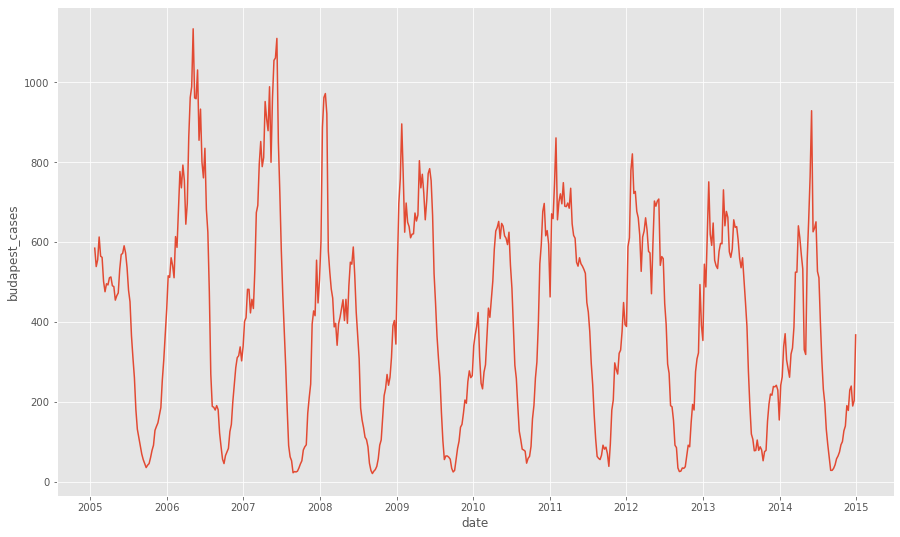

In [71]:
# plot 4 week rolling averages
plt.figure(figsize=(15, 9))
sns.lineplot(x = pox.rolling(4).sum().dropna().index, y = 'budapest_cases', data = pox.rolling(4).sum().dropna());

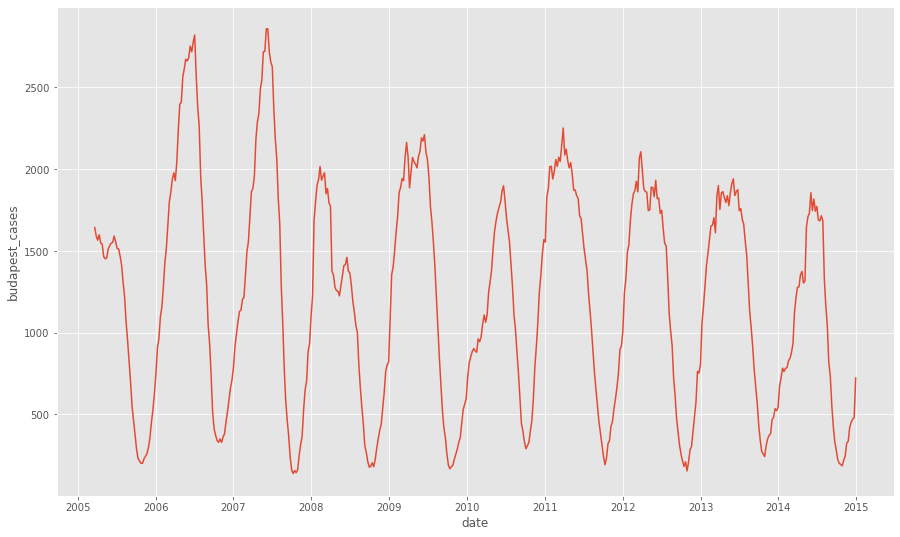

In [73]:
# plot 12 week rolling averages
plt.figure(figsize=(15, 9))
sns.lineplot(x = pox.rolling(12).sum().dropna().index, y = 'budapest_cases', data = pox.rolling(12).sum().dropna());

For 12 week rolling the chart look more easily understand. there is seasonality.

### Plot yearly chickenpox cases

You may need to use `resample` again for this.

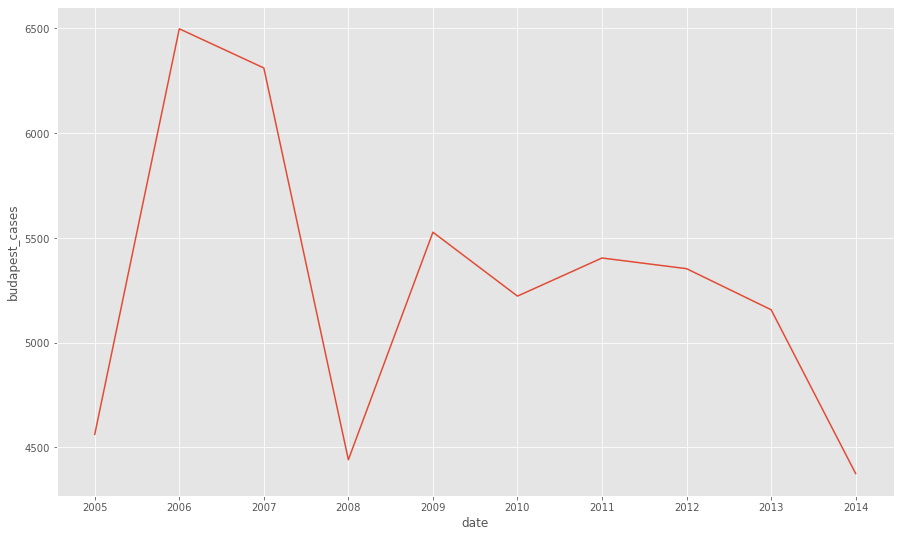

In [78]:
# plot yearly chickenpox cases
plt.figure(figsize=(15, 9))
sns.lineplot(x = pox.resample('Y').sum().index.year, y = 'budapest_cases', data = pox.resample('Y').sum())
plt.xticks(pox.resample('Y').sum().index.year);

From yearly line chart they have trend that cases will decrease.